In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings(action = 'ignore')

import os
import sys

import cv2
import glob


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.layers import (Flatten, Dense, Activation, MaxPooling2D, Conv2D, InputLayer)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD


from numba import double, jit, njit, vectorize

import progressbar

import time

import PIL
from PIL import Image, ImageEnhance

import math

from sklearn.metrics import (confusion_matrix, classification_report, ConfusionMatrixDisplay)
from sklearn.utils import shuffle

import pickle

from skimage.transform import resize

from moviepy.editor import VideoFileClip, concatenate_videoclips


In [2]:
path_training_flip   = glob.glob('Houses Dataset/Training Set/Flip_Mixed_Training/Flip_Kitchen_Training/*.jpg')
path_training_noflip = glob.glob('Houses Dataset/Training Set/Dont Flip_Mixed_Training/Dont Flip_Kitchen_Training/*.jpg')

path_testing_flip   = glob.glob('Houses Dataset/Testing Set/Flip_Mixed_Testing/Flip_Kitchen_Testing/*.jpg')
path_testing_noflip = glob.glob('Houses Dataset/Testing Set/Dont Flip_Mixed_Testing/Dont Flip_Kitchen_Testing/*.jpg')

In [3]:
def image_preprocessing(path):
    
    images = []

    for i in path:
        img = cv2.imread(i)
        img = cv2.resize(img, dsize = (32,32), interpolation=cv2.INTER_CUBIC)
        y, h, x, w = 2, 30, 2, 30 #evenly cut outside border around all sides
        img = img[y:h, x:w]

        alpha=1.5
        beta=0.5
        img = cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)
        img = cv2.bitwise_not(img)
        img = img/255               

        images.append(img)

    return images

In [4]:
img_training_flip = image_preprocessing(path_training_flip)

img_training_noflip = image_preprocessing(path_training_noflip)

img_testing_flip = image_preprocessing(path_testing_flip)

img_testing_noflip = image_preprocessing(path_testing_noflip)

In [5]:
len(img_training_flip),len(img_training_noflip),len(img_testing_flip),len(img_testing_noflip)

(69, 69, 17, 17)

In [6]:
y_train_flip =   [1 for i in range(0, len(img_training_flip))]

y_train_noflip = [0 for i in range(0, len(img_training_noflip))]

y_test_flip =    [1 for i in range(0, len(img_testing_flip))]

y_test_noflip =  [0 for i in range(0, len(img_testing_noflip))]

In [7]:
X_train = np.concatenate((img_training_flip, img_training_noflip))

X_test =  np.concatenate((img_testing_flip, img_testing_noflip))

y_train = np.append(y_train_flip, y_train_noflip)

y_test =  np.append(y_test_flip, y_test_noflip)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(138, 28, 28, 3)
(138,)
(34, 28, 28, 3)
(34,)


In [9]:
Xy_train = np.array(list(zip(X_train,y_train)))

np.random.shuffle(Xy_train)

Xy_train_shuffle = Xy_train

In [10]:
Xy_test = np.array(list(zip(X_test,y_test)))

np.random.shuffle(Xy_test)

Xy_test_shuffle = Xy_test

In [11]:
X_train_shuffled = []
y_train_shuffled = []

for i in Xy_train_shuffle:
    image = i[0]
    X_train_shuffled.append(image)
    label = i[1]
    y_train_shuffled.append(label)

X_train_shuffled = np.array(X_train_shuffled)

y_train_shuffled = np.array(y_train_shuffled)

In [12]:
X_test_shuffled = []
y_test_shuffled = []

for i in Xy_test_shuffle:
    image = i[0]
    X_test_shuffled.append(image)
    label = i[1]
    y_test_shuffled.append(label)

X_test_shuffled = np.array(X_test_shuffled)

y_test_shuffled = np.array(y_test_shuffled)

In [13]:
print(X_train_shuffled.shape)
print(y_train_shuffled.shape)
print(X_test_shuffled.shape)
print(y_test_shuffled.shape)

(138, 28, 28, 3)
(138,)
(34, 28, 28, 3)
(34,)


In [14]:
def neural_network():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', kernel_initializer='he_uniform', input_shape=(28, 28, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    
    opt = SGD(lr=.001, momentum=.9)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

    return model

In [15]:
model = neural_network()

model.fit(X_train_shuffled, y_train_shuffled, epochs = 15)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 5ms/step - loss: 0.7248 - accuracy: 0.5139


2023-01-17 18:49:00.416544: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-01-17 18:49:00.416714: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 2/15
5/5 [==============================] - 0s 5ms/step - loss: 0.6656 - accuracy: 0.5962
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 0.6043 - accuracy: 0.7169
Epoch 4/15
5/5 [==============================] - 0s 5ms/step - loss: 0.5500 - accuracy: 0.7362
Epoch 5/15
5/5 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.9014
Epoch 6/15
5/5 [==============================] - 0s 4ms/step - loss: 0.4851 - accuracy: 0.7655
Epoch 7/15
5/5 [==============================] - 0s 4ms/step - loss: 0.4712 - accuracy: 0.8504
Epoch 8/15
5/5 [==============================] - 0s 5ms/step - loss: 0.4334 - accuracy: 0.8922
Epoch 9/15
5/5 [==============================] - 0s 4ms/step - loss: 0.4263 - accuracy: 0.8530
Epoch 10/15
5/5 [==============================] - 0s 7ms/step - loss: 0.4174 - accuracy: 0.8928
Epoch 11/15
5/5 [==============================] - 0s 5ms/step - loss: 0.3605 - accuracy: 0.9003
Epoch 12/15
5/5 [=====================

In [16]:
predictions = model.predict(X_test_shuffled)

binary_values = []

for i in predictions:
    if i < 0.5:
        binary_values.append(0)
    else:
        binary_values.append(1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


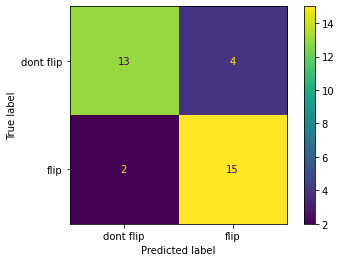

In [17]:
cmx = confusion_matrix(y_test_shuffled, binary_values)

cmd = ConfusionMatrixDisplay(cmx, display_labels=['dont flip','flip'])
cmd.plot();

In [18]:
print(classification_report(y_test_shuffled, binary_values))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.79      0.88      0.83        17

    accuracy                           0.82        34
   macro avg       0.83      0.82      0.82        34
weighted avg       0.83      0.82      0.82        34



In [19]:
model_classifier = model.save('flip_house_classifier')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: flip_page_classifier/assets


2023-01-17 18:49:01.307736: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
